<a href="https://colab.research.google.com/github/Sridevimesala/Energy_Prediction-/blob/main/Energy_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd   #importing  pandas library for data manuplation.
import numpy as np    # importing numpy library for numerical operations on data set.
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")   # here we use ";" for to seperate the data values called as df.
df.head()   # It shows the first 5 rows of the data frame.



<ipython-input-2-a1585501dda2>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',sep=";")   # here we use ";" for to seperate the data values called as df.


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Using df.info() is particularly useful for getting a quick overview of your dataset and assessing the data types and completeness of our data.




In [ ]:
df.shape   # It shows the no.of rows and columns in a dataset.


(2075259, 9)

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


It shows the end of the dataset based on the given input like df.tail(10)

In [ ]:
df.describe(include=object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274



The df.describe(include=object) method in pandas provides a analysis of the DataFrame for columns with data type object, which typically represents string data.

In [ ]:
df.shape


(2075259, 9)

In [ ]:
df.isnull().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,True


df.isnull().any() shows the boolean values

In [ ]:
df.isnull().sum()


,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


The df.isnull().sum() method in pandas calculates the total number of missing (null) values for each column in the DataFrame. It returns a Series where the index is the column names and the values are the counts of missing entries.

In [ ]:
round(100 * df.Sub_metering_3.isnull().sum()/len(df),3)

1.252

percentage of missing values in the Sub_metering_3 column of the DataFrame and rounds the result

In [ ]:
df.describe()


,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


This function generates descriptive statistics for a DataFrame, which provides insights into the data's distribution.

In [ ]:
df.fillna(0)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.isnull().sum()


,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
df.fillna(df['Sub_metering_3'].mean())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.fillna(df['Sub_metering_3'].median())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.dropna().shape


(2049280, 9)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

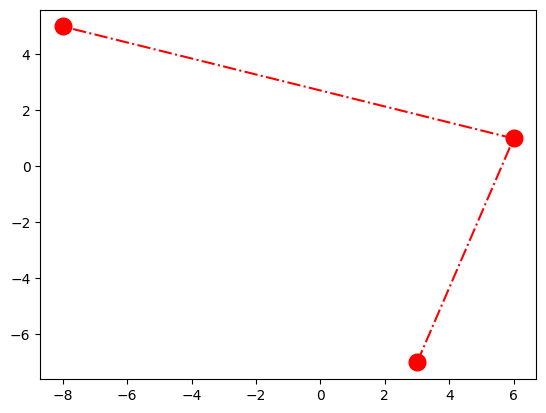

In [ ]:
d1 = np.array([3,6,-8])
d2 = np.array([-7,1,5])
plt.plot(d1,d2, 'ro', markersize = 12, linestyle = '-.')

In [ ]:
df['Global_active_power'] = df['Global_active_power'].astype(float)

In [ ]:
type(df['Global_active_power'])

pandas.core.series.Series

**Mile Stone2**

Framing  Questions

What are the peak hours for power consumption?

Is there a correlation between voltage and global intensity?

How does energy usage vary across different days, times, or sub-metering areas?



In [ ]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sn

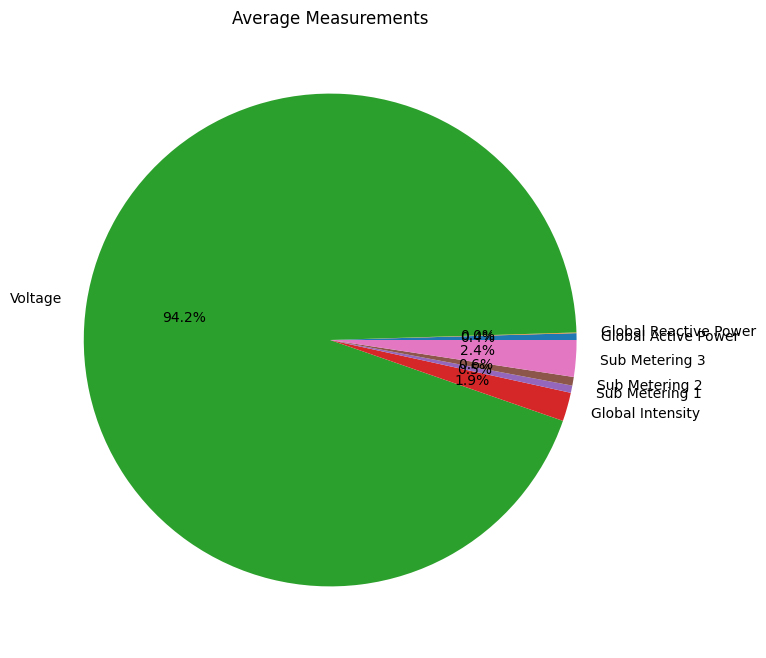

In [ ]:
# to create a pie chart for each column in dataset:
labels = ['Global Active Power', 'Global Reactive Power', 'Voltage',
          'Global Intensity', 'Sub Metering 1', 'Sub Metering 2',
          'Sub Metering 3']

# Assuming df is DataFrame
values = [df['Global_active_power'].mean(),
          df['Global_reactive_power'].mean(),
          df['Voltage'].mean(),
          df['Global_intensity'].mean(),
          df['Sub_metering_1'].mean(),
          df['Sub_metering_2'].mean(),
          df['Sub_metering_3'].mean()]

# Creating pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Average Measurements')
plt.show()

In [11]:

# Example data loading
data = {
    'Date': ['16/12/2006', '16/12/2006', '16/12/2006', '16/12/2006', '16/12/2006'],
    'Time': ['17:24:00', '17:25:00', '17:26:00', '17:27:00', '17:28:00'],
    'Global_active_power': [4.216, 5.360, 5.374, 5.388, 3.666],
    'Global_reactive_power': [0.418, 0.436, 0.498, 0.502, 0.528],
    'Voltage': [234.84, 233.63, 233.29, 233.74, 235.68],
    'Global_intensity': [18.4, 23.0, 23.0, 23.0, 15.8],
    'Sub_metering_1': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Sub_metering_2': [1.0, 1.0, 2.0, 1.0, 1.0],
    'Sub_metering_3': [17.0, 16.0, 17.0, 17.0, 17.0]
}
df = pd.DataFrame(data)

# Converting Date and Time into a DateTime format
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.day_name()


<ipython-input-11-e7a602561112>:16: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


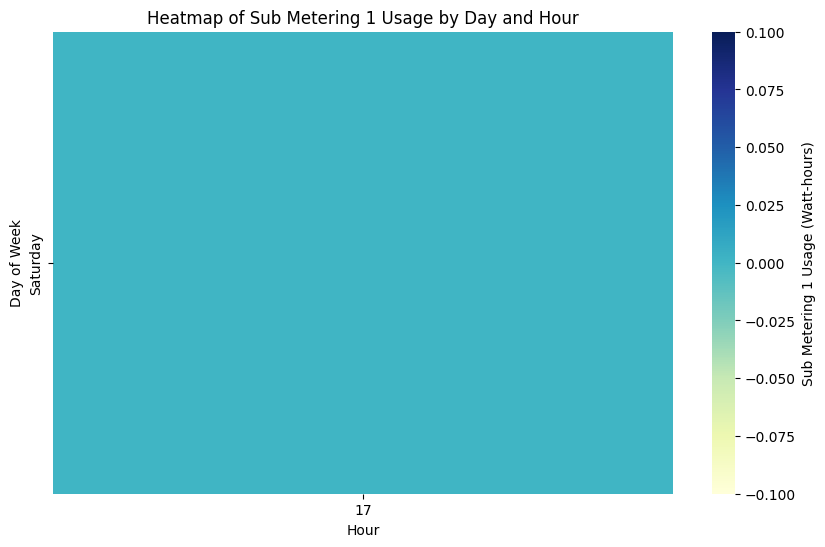

In [7]:
# Group by Day and Hour, and calculating mean usage for Sub_metering_1
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='Sub_metering_1', aggfunc='mean')

# Plot heatmap for Sub_metering_1 using by hour and day
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Sub Metering 1 Usage (Watt-hours)'})
plt.title('Heatmap of Sub Metering 1 Usage by Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()


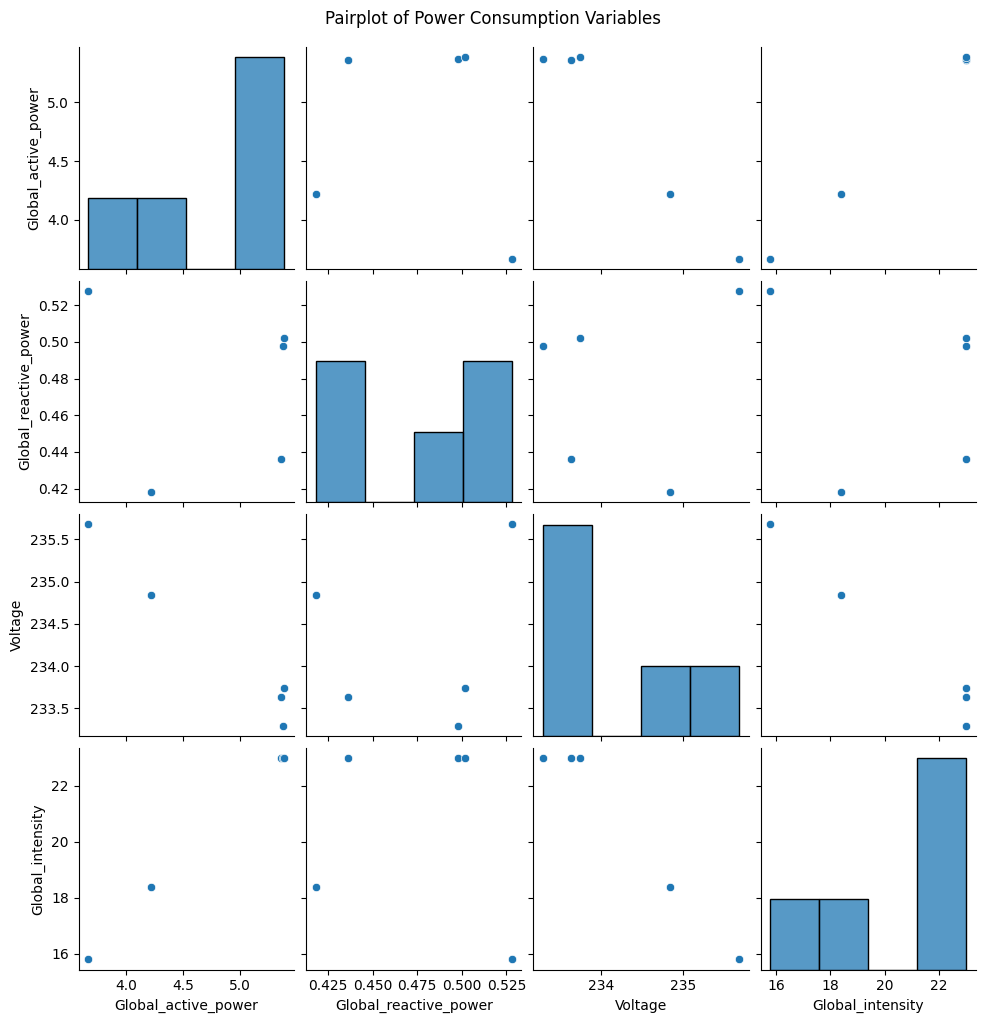

In [8]:
# Pairplot for numerical columns
sns.pairplot(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.suptitle('Pairplot of Power Consumption Variables', y=1.02)
plt.show()


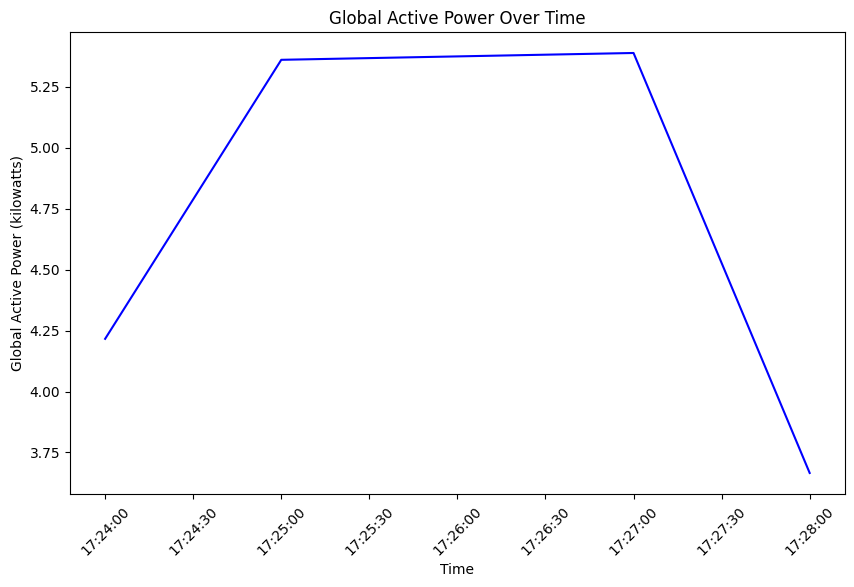

In [9]:
# Line plot of Global_active_power over time
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['Global_active_power'], color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.show()


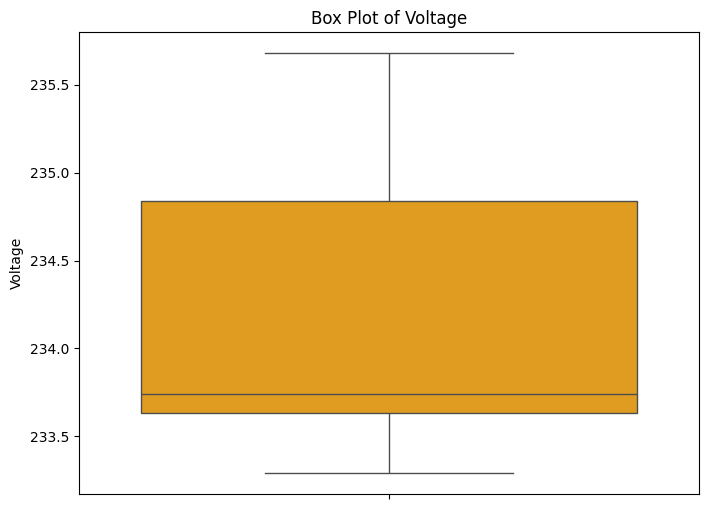

In [10]:
# Box plot for Voltage
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Voltage', color='orange')
plt.title('Box Plot of Voltage')
plt.ylabel('Voltage')
plt.show()


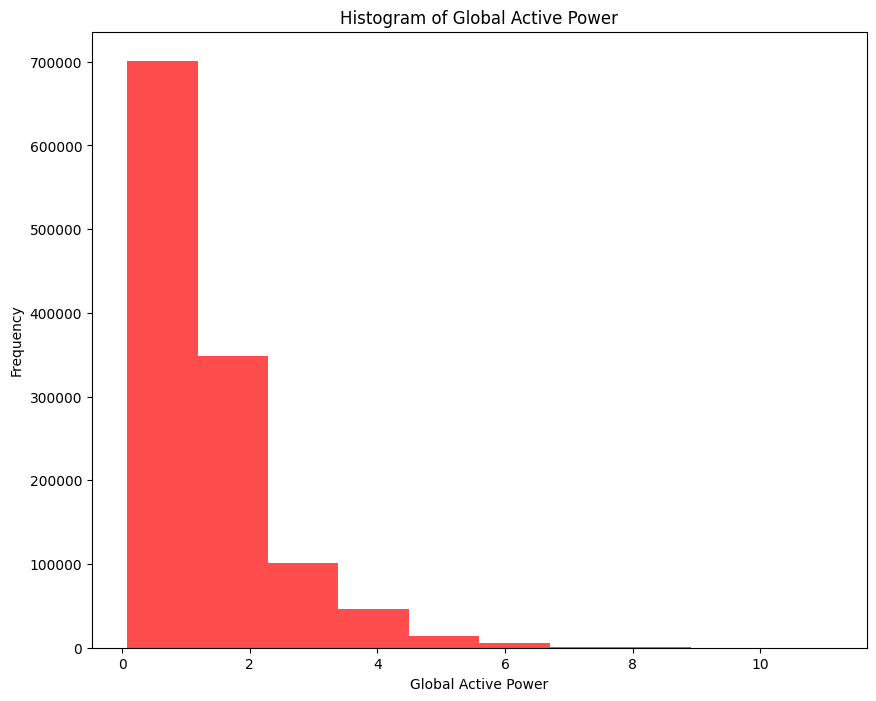

In [ ]:
# histogram for Frequency
plt.figure(figsize=(10, 8))
plt.hist(df['Global_active_power'], color='red', alpha=0.7)
plt.title('Histogram of Global Active Power')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.show()

**Summary of Plots:**
These plots help analyze patterns in power consumption:

**Pie Plot**: It Shows the Average of all the columns in the dataset.

**Heatmap**: Shows sub-metering usage patterns across days and hours.

**Pairplot**: Reveals correlations between power consumption variables.

**Line Plot**: Visualizes power usage trends over time.

**Box Plot**: Highlights the distribution of voltage.

**Histogram**: It shows the frequency of Global Active Power.

In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [ ]:
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute # if you want as minutes are not mentioned
df.head()

<ipython-input-8-3a4ebfba6603>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


In [ ]:
type(df['DateTime'])


pandas.core.series.Series

In [ ]:
df.describe(include='object')

,Date,Time
count,1221823,1221823
unique,850,1440
top,14/2/2008,17:24:00
freq,1440,849


In [ ]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
count,1.217686e+06,1.217686e+06,1.217686e+06,1.217686e+06,1.217686e+06,1.217685e+06,1.217685e+06,1221823,1.221823e+06,1.221823e+06,1.221823e+06,1.221823e+06,1.221823e+06
mean,1.132055e+00,1.156921e-01,2.403638e+02,4.804752e+00,1.208508e+00,1.443030e+00,6.124451e+00,2008-02-13 23:14:59.999999488,2.007654e+03,6.102799e+00,1.573171e+01,1.150044e+01,2.950020e+01
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.980000e-01,0.000000e+00,2.383000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-07-16 20:19:30,2.007000e+03,3.000000e+00,8.000000e+00,5.000000e+00,1.500000e+01
50%,6.000000e-01,9.400000e-02,2.405300e+02,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2008-02-13 23:15:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.568000e+00,1.800000e-01,2.425900e+02,6.600000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2008-09-13 02:10:30,2.008000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01
max,1.112200e+01,1.390000e+00,2.539400e+02,4.840000e+01,8.200000e+01,7.800000e+01,3.100000e+01,2009-04-13 05:06:00,2.009000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01
std,1.127580e+00,1.085058e-01,3.406716e+00,4.748501e+00,6.422339e+00,6.333617e+00,8.306665e+00,NaN,7.093184e-01,3.598590e+00,8.817325e+00,6.923702e+00,1.731814e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221823 entries, 0 to 1221822
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1221823 non-null  object        
 1   Time                   1221823 non-null  object        
 2   Global_active_power    1217686 non-null  float64       
 3   Global_reactive_power  1217686 non-null  float64       
 4   Voltage                1217686 non-null  float64       
 5   Global_intensity       1217686 non-null  float64       
 6   Sub_metering_1         1217686 non-null  float64       
 7   Sub_metering_2         1217685 non-null  float64       
 8   Sub_metering_3         1217685 non-null  float64       
 9   DateTime               1221823 non-null  datetime64[ns]
 10  Year                   1221823 non-null  int32         
 11  Month                  1221823 non-null  int32         
 12  Day                    12218

In [ ]:
# Start of your data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
1221818,13/4/2009,0.209722,0.314,0.0,241.04,1.4,0.0,0.0,1.0,2009-04-13 05:02:00,2009,4,13,5,2,0.0,0
1221819,13/4/2009,0.210417,0.314,0.0,241.22,1.4,0.0,0.0,0.0,2009-04-13 05:03:00,2009,4,13,5,3,0.0,0
1221820,13/4/2009,0.211111,0.314,0.0,241.03,1.4,0.0,0.0,1.0,2009-04-13 05:04:00,2009,4,13,5,4,0.0,0
1221821,13/4/2009,0.211806,0.314,0.0,241.09,1.4,0.0,0.0,1.0,2009-04-13 05:05:00,2009,4,13,5,5,0.0,0
1221822,13/4/2009,0.212500,0.316,0.0,241.16,1.4,0.0,NaN,NaN,2009-04-13 05:06:00,2009,4,13,5,6,0.0,0


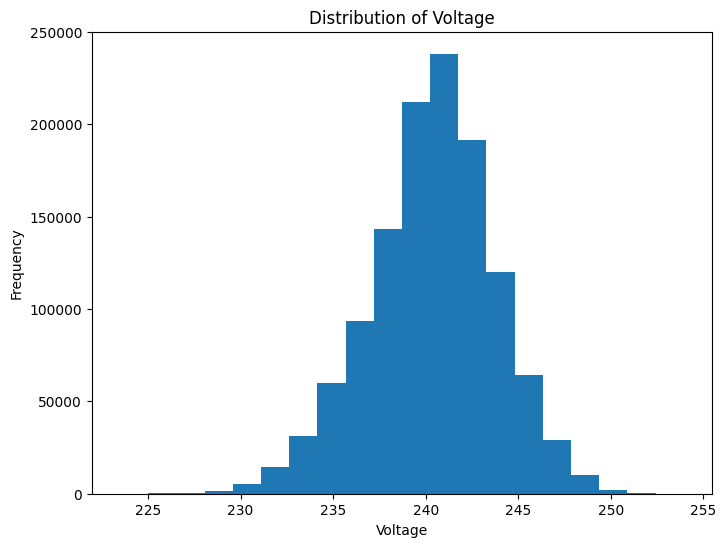

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20)
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()

Text(0.5, 1.0, 'Mean global active power by day for a month')

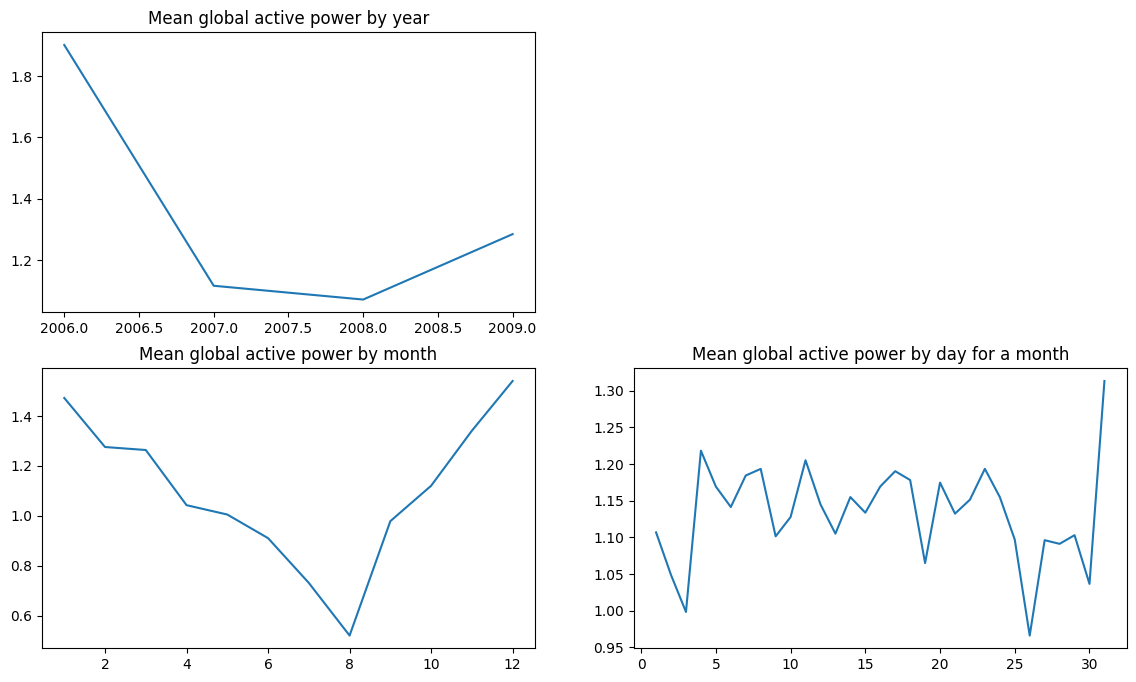

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')



plt.subplot(2,2,3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

plt.subplot(2,2,4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day for a month')

In [ ]:
df.drop(df[['Time','Date']], inplace=True, axis='columns')

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,1.0,1
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,1.0,1
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,1.0,1
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,1.0,1
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,1.0,1


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('Global_active_power', axis=1) # inputs
y = df['Global_active_power'] # output